OSCILADOR ARMÓNICO AMORTIGUADO FORZADO: Evolución del diagrama de bifurcación

In [55]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scipy
from math import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


VALORES NUMÉRICOS DEL PROBLEMA

Condiciones iniciales

In [56]:
x_0 = 1 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

Parámetros del sistema

In [57]:
w_0 = 0.5 # Frecuencia natural x>0
amort = 0.125 # constante de amortiguamiento
f_0 = 0.25 # Amplitud de la fuerza por unidad de masa

Medida del tiempo

In [58]:
dt = 0.01 # Paso de tiempo
tf = 1000 # Tiempo de medida (se asume que t0 = 0)
t = np.linspace(0,tf,int(tf/dt)+1) # Vector de instantes de tiempo

Frencuencia angular natural para x<0

In [59]:
#dW_0 = 0.1 # paso en la frecuencia natural para x<0
#W_0 =  np.array([w_0+i*dW_0 for i in range(int(7.5/dW_0)+1)]) # Frecuencia natural para x<0
W_0 = np.array([0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.5,6,6.5,7,7.5,8])
#W_0 = np.array([0.5])

Frencuencia angular de la fuerza externa

In [60]:
dw = 0.1 # paso en la frecuencia externa
w =  np.array([i*dw for i in range(int(0.5/dw),int(8/dw)+1)]) # Frecuencia fuerza externa

DEFINIMOS UNA FRECUENCIA NATURAL DEL OSCILADOR QUE DEPENDE DE LA POSICIÓN

In [61]:
def W(x,W_0): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

ECUACIÓN DIFERENCIAL

In [62]:
def EDO(t,y,w,W_0):
    x,v = y
    return [v,-2*amort*v-W(x,W_0)**2*x+f_0*np.cos(w*t)]

CÁLCULO DEL MOVIMIENTO DEL SISTEMA

In [63]:
xp = []
vp = []
pos = np.zeros([w.size,t.size,W_0.size])
vel = np.zeros([w.size,t.size,W_0.size])

for j in range(np.size(W_0)):
    xpj = []
    vpj = []
    for i in range(np.size(w)):

        sol = scipy.integrate.solve_ivp(EDO, [0,tf], [x_0,v_0], method = 'RK23',t_eval = t,args = [w[i],W_0[j]])
        x,v = sol.y
        pos[i,:,j] = x
        vel[i,:,j] = v

        T = 2*pi/w[i] # Periodo fuerza externa
        n = int(tf/T) # Número de puntos del diagrama de Poincaré
        ind = np.array([np.searchsorted(t,T*(i+1)) for i in range(n-1)]) # Calculamos los índices del diagrama de Poincaré
        xpj.append(x[ind]) # Asignamos índices encontrados en tiempos con posiciones y velocidades (/max(x[ind]))
        vpj.append(v[ind])
    xp.append(xpj)
    vp.append(vpj)

EVOLUCIÓN DEL DIAGRAMA DE BIFURCACIÓN SEGÚN ω₀ (x<0)

Actualización del diagrama en cada frame de la animación

In [64]:
def update_Bifurcation(n,xp):
    plt.cla()
    num = 50 # Número de puntos representados por cada w
    for i in range(w.size):
        plt.plot(w[i]*np.ones(num),np.array(xp[n][i],dtype=object)[-num:],'.',color='red',markersize='0.5',alpha=0.5)
    plt.ylabel('x (m)')
    plt.xlabel('ω (s⁻¹)')
    plt.xlim(min(w),max(w))
    plt.title('Evolución del diagrama de bifurcación')
    plt.suptitle('ω₀ = '+str(w_0)+' s⁻¹ (x>0); ω₀ = '+str(format(W_0[n],'.2f'))+' s⁻¹ (x>0)')
    

Representación de resultados mediante animación

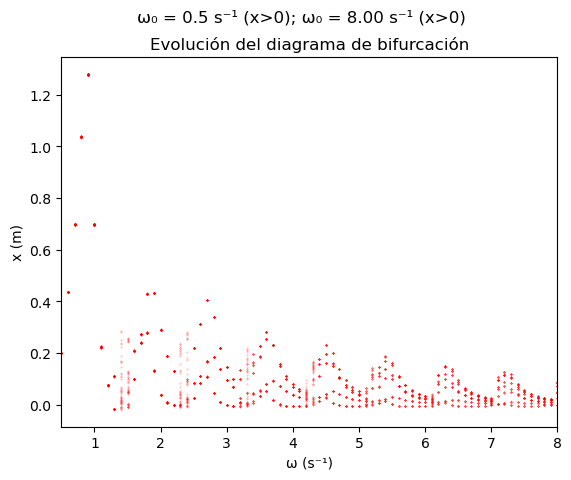

In [66]:
num = 50 # Número de puntos representados por cada w
im = plt.figure()
for i in range(w.size):
    plt.plot(w[i]*np.ones(num),np.array(xp[0][i],dtype=object)[-num:],'.',color='red',markersize='0.5',alpha=1)
plt.ylabel('x (m)')
plt.xlabel('ω (s⁻¹)')
plt.xlim(min(w),max(w))
plt.title('Evolución del diagrama de bifurcación')
plt.suptitle('ω₀ = '+str(w_0)+' s⁻¹ (x>0); ω₀ = '+str(format(W_0[0],'.2f'))+' s⁻¹ (x>0)')

animP = animation.FuncAnimation(im, update_Bifurcation, np.size(W_0), fargs = (xp, ), interval = 150)
animP.save('Evolución Bifurcación.gif')
animP.save('Evolución Bifurcación.mp4')